In [12]:
import pandas as pd

dataset = pd.read_csv("data.csv")
dataset = dataset.drop("customer_id", axis=1)

In [13]:
dataset.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [14]:
dataset.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [15]:
dataset.credit_score == 850

0       False
1       False
2       False
3       False
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: credit_score, Length: 10000, dtype: bool

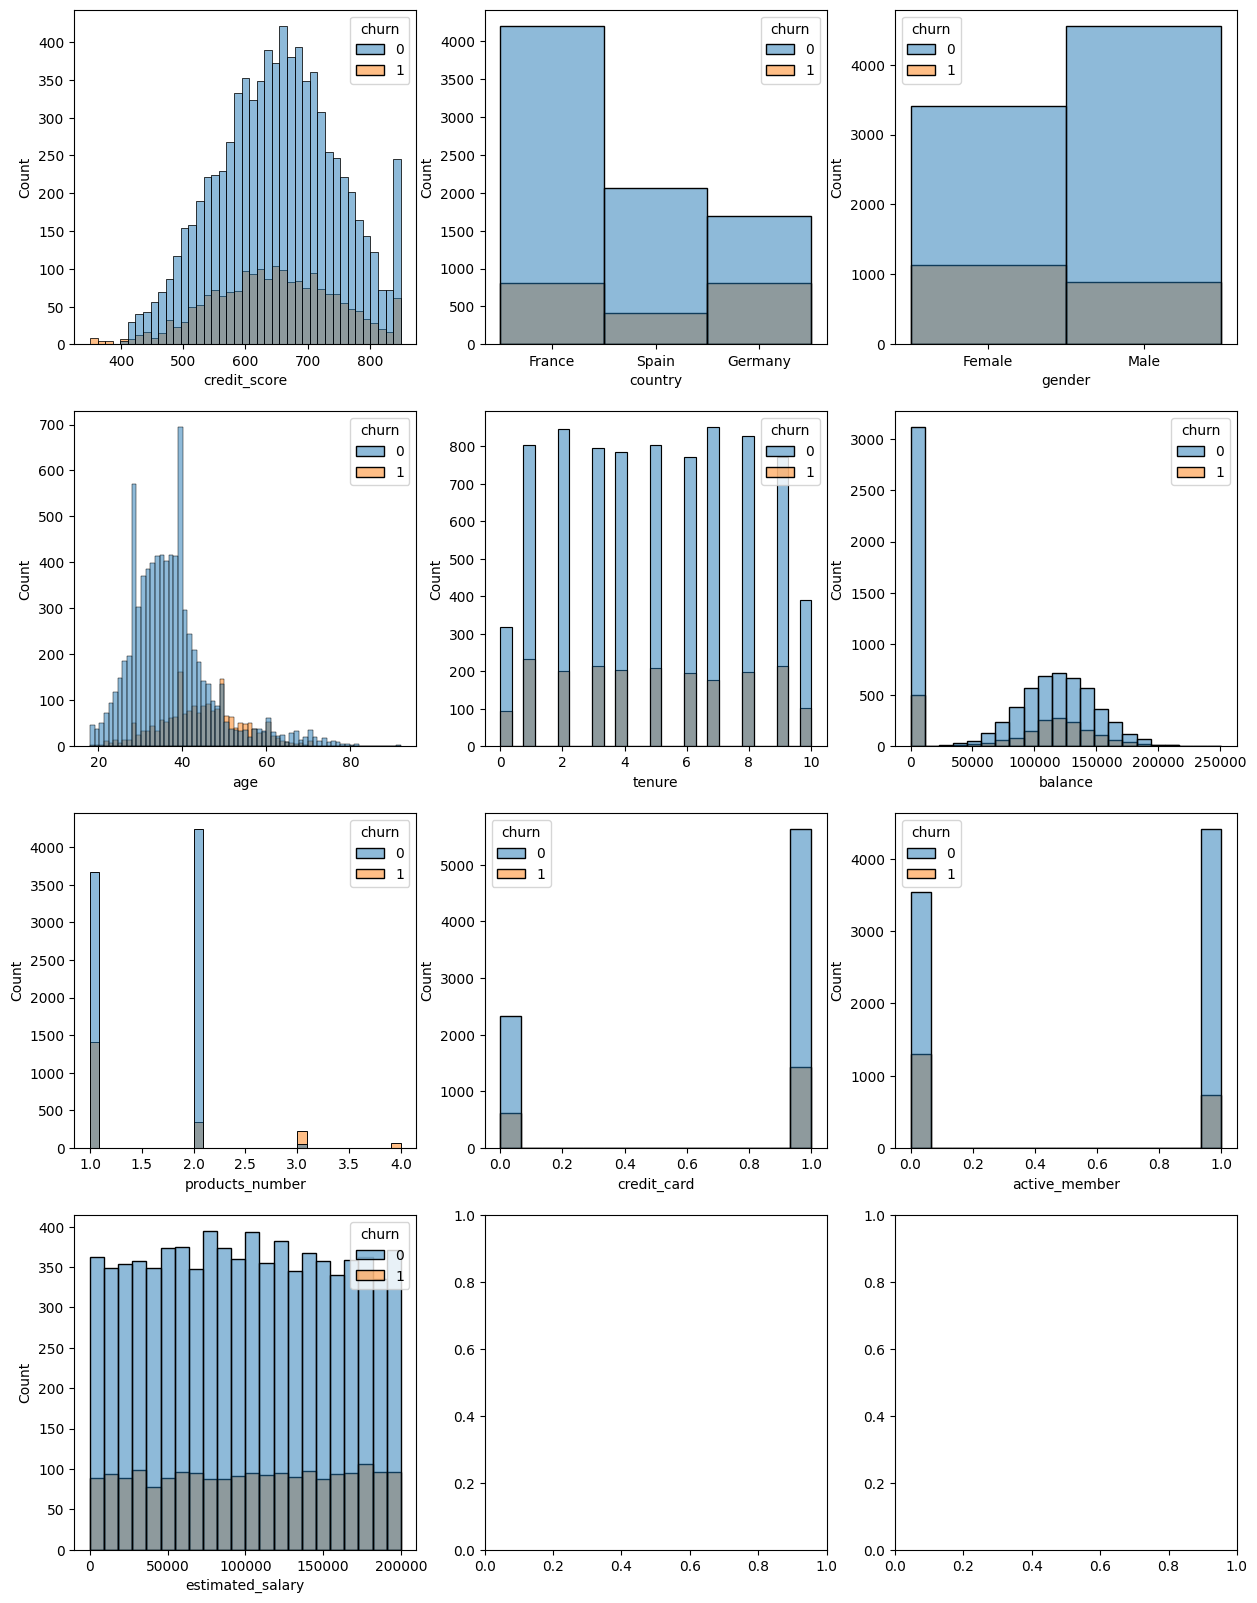

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns


continuous_data_columns = ["age", "credit_score", "balance", "estimated_salary", "tenure"]
categorical_data_columns = ["country", "gender", "products_number", "credit_card", "active_member"]


fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(dataset.columns)-1):
    sns.histplot(data=dataset, x=dataset.columns[i],hue="churn",ax=axs[i])

Anderson-Darling normal dist Test Results:
Statistic: 75.5956
Significance Level: 25.0% | Critical Value: 0.4260
The data does not follow a normal distribution at the 25.0% level.
Kolmogorov-Smirnov Test Statistic: 1.0000
p-value: 0.0000


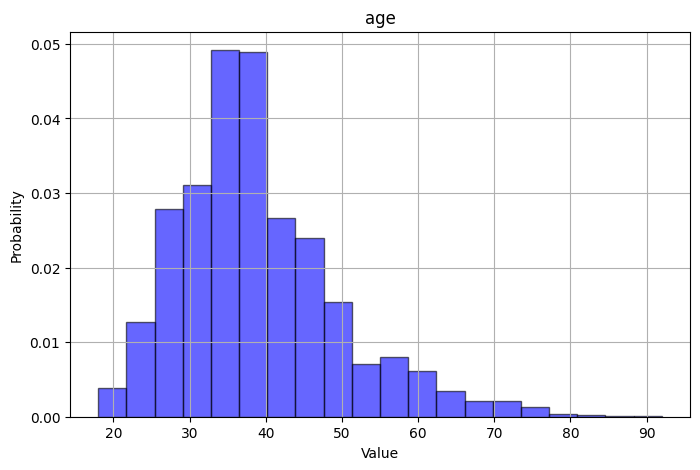

Anderson-Darling normal dist Test Results:
Statistic: 21.1824
Significance Level: 25.0% | Critical Value: 0.4260
The data does not follow a normal distribution at the 25.0% level.
Kolmogorov-Smirnov Test Statistic: 1.0000
p-value: 0.0000


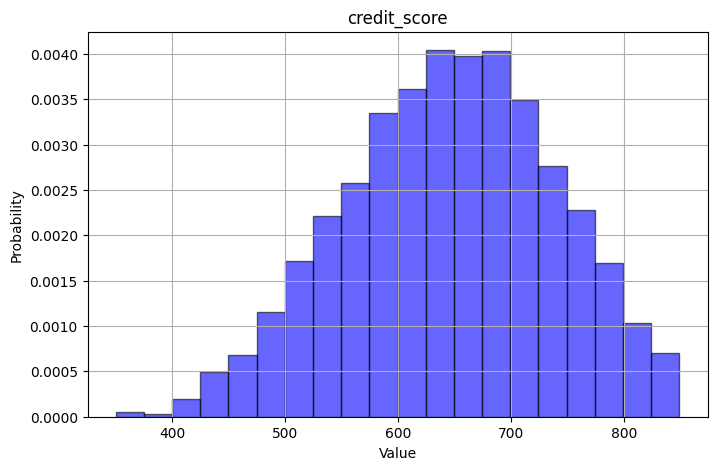

Anderson-Darling normal dist Test Results:
Statistic: 2.1669
Significance Level: 25.0% | Critical Value: 0.4260
The data does not follow a normal distribution at the 25.0% level.
Kolmogorov-Smirnov Test Statistic: 1.0000
p-value: 0.0000


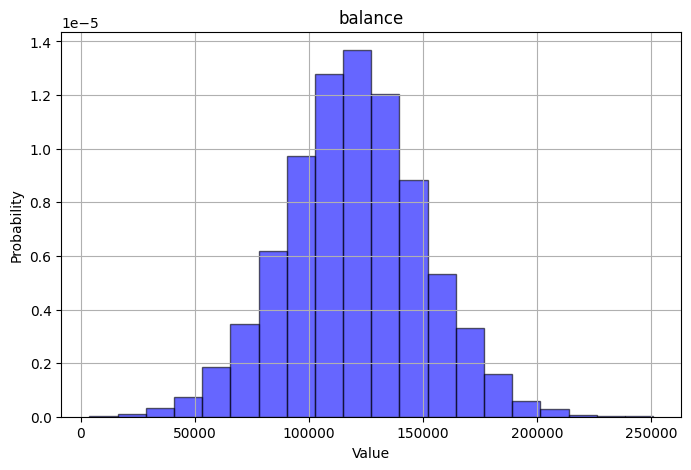

Anderson-Darling normal dist Test Results:
Statistic: 115.0092
Significance Level: 25.0% | Critical Value: 0.4260
The data does not follow a normal distribution at the 25.0% level.
Kolmogorov-Smirnov Test Statistic: 1.0000
p-value: 0.0000


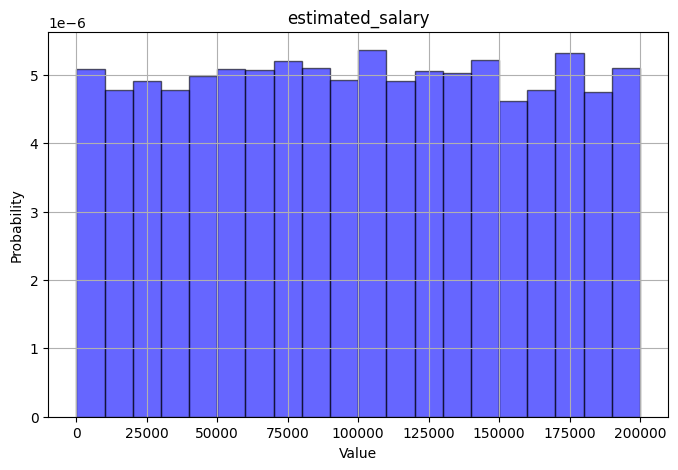

Anderson-Darling normal dist Test Results:
Statistic: 160.1908
Significance Level: 25.0% | Critical Value: 0.4260
The data does not follow a normal distribution at the 25.0% level.
Kolmogorov-Smirnov Test Statistic: 0.7360
p-value: 0.0000


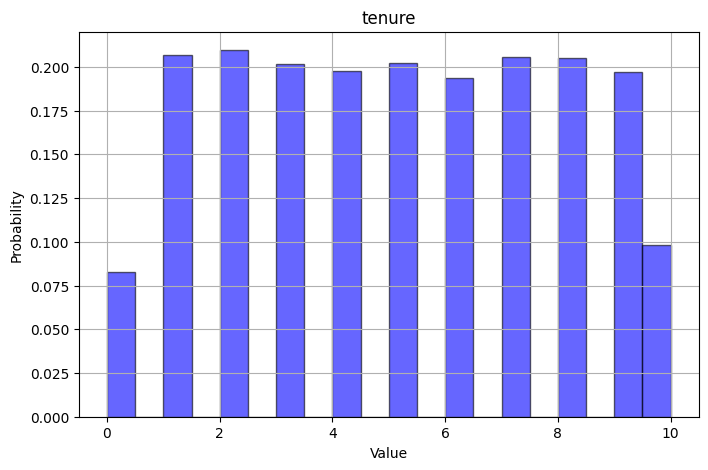

In [17]:
from scipy.stats import anderson, kstest

for column in continuous_data_columns:
    column_data = dataset[column]

    if column == "credit_score":
        column_data = column_data[column_data < 850]
    if column == "balance":
        column_data = column_data[column_data >= 1]

    
    # result = anderson(column_data, dist='norm')
    # print("Anderson-Darling normal dist Test Results:")
    # print(f"Statistic: {result.statistic:.4f}")
    # for i, (sig_level, crit_value) in enumerate(zip(result.significance_level, result.critical_values)):
    #     print(f"Significance Level: {sig_level}% | Critical Value: {crit_value:.4f}")
    #     if result.statistic < crit_value:
    #         print(f"The data appears to follow a normal distribution at the {sig_level}% level.")
    #     else:
    #         print(f"The data does not follow a normal distribution at the {sig_level}% level.")

    result = anderson(column_data, dist='logistic')
    print("Anderson-Darling normal dist Test Results:")
    print(f"Statistic: {result.statistic:.4f}")
    for i, (sig_level, crit_value) in enumerate(zip(result.significance_level, result.critical_values)):
        print(f"Significance Level: {sig_level}% | Critical Value: {crit_value:.4f}")
        if result.statistic < crit_value:
            print(f"The data appears to follow a normal distribution at the {sig_level}% level.")
        else:
            print(f"The data does not follow a normal distribution at the {sig_level}% level.")
            break

    ks_statistic, ks_p_value = kstest(column_data, 'logistic')

    # Output the results
    print(f"Kolmogorov-Smirnov Test Statistic: {ks_statistic:.4f}")
    print(f"p-value: {ks_p_value:.4f}")

    
    # Step 3: Compute the normalized histogram (probabilities)
    hist, bin_edges = np.histogram(column_data, bins=20, density=True)
    
    # Step 5: Plot the histogram
    plt.figure(figsize=(8, 5))
    plt.hist(column_data, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Probability")
    plt.grid()
    plt.show()

<Axes: >

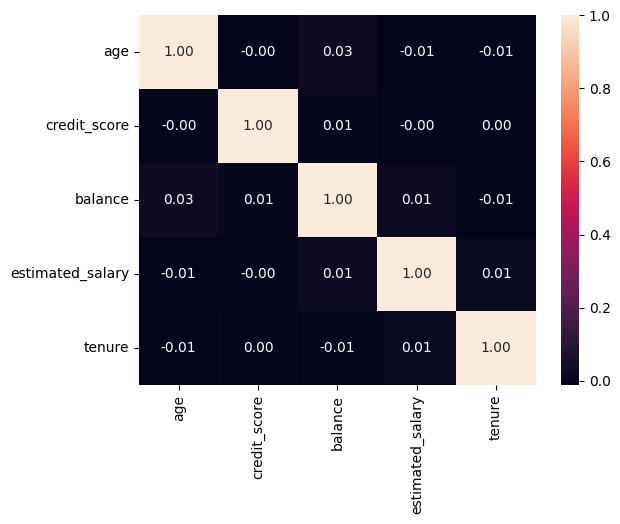

In [18]:
dataset_continuous_columns = dataset[continuous_data_columns]
dataset_continuous_columns_correlation = dataset[continuous_data_columns].corr()

sns.heatmap (dataset_continuous_columns_correlation, annot=dataset_continuous_columns_correlation, fmt='.2f')

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)

# Fit selector on the training data
X_train_reduced = selector.fit_transform(dataset_continuous_columns, dataset["churn"])

# Transform the test data
X_test_reduced = selector.transform(dataset_continuous_columns)

# Get the scores for all features
print("Feature Scores:", selector.scores_)
print("P-values Scores:", selector.pvalues_)

Feature Scores: [886.06327491   7.34452216 142.4738325    1.46326192   1.96016363]
P-values Scores: [1.23993131e-186 6.73821389e-003 1.27556332e-032 2.26440428e-001
 1.61526849e-001]


In [20]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dependency_test_dataset = dataset.copy()

dependency_test_dataset["gender"] = label_encoder.fit_transform(dependency_test_dataset['gender'])
dependency_test_dataset["country"] = label_encoder.fit_transform(dependency_test_dataset['country'])

selector = SelectKBest(score_func=chi2, k=2)

# Fit selector on the training data
X_train_reduced = selector.fit_transform(dependency_test_dataset[categorical_data_columns], dependency_test_dataset["churn"])

# Transform the test data
X_test_reduced = selector.transform(dependency_test_dataset[categorical_data_columns])

# Get the scores for all features
print("Feature Scores:", selector.scores_)
print("P-values Scores:", selector.pvalues_)

Feature Scores: [ 11.85325057  51.53992627   5.05539429   0.15004097 118.19941432]
P-values Scores: [5.75607838e-04 7.01557451e-13 2.45493956e-02 6.98496209e-01
 1.56803624e-27]


In [21]:
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value for all pairs
for col1 in dataset_continuous_columns.columns:
    for col2 in dataset_continuous_columns.columns:
        if col1 != col2:
            corr_coefficient, p_value = pearsonr(dataset_continuous_columns[col1], dataset_continuous_columns[col2])
            if p_value <= 0.05:
                print(f"Correlation between {col1} and {col2}: {corr_coefficient:.3f}, p-value: {p_value:.3f}")

Correlation between age and balance: 0.028, p-value: 0.005
Correlation between balance and age: 0.028, p-value: 0.005


In [22]:
from scipy.stats import f_oneway

dataset_categorical_columns = dataset[categorical_data_columns]

for cat_col in dataset_categorical_columns:
    for cont_col in dataset_continuous_columns:
        # Prepare data for ANOVA (group the continuous data by categories)
        grouped_data = [dataset[dataset[cat_col] == category][cont_col] for category in dataset[cat_col].unique()]
        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*grouped_data)
                
        if p_value < 0.05:
            print(f"  - The difference in {cont_col} means is statistically significant across the categories of {cat_col}.\n")

  - The difference in age means is statistically significant across the categories of country.

  - The difference in balance means is statistically significant across the categories of country.

  - The difference in age means is statistically significant across the categories of gender.

  - The difference in age means is statistically significant across the categories of products_number.

  - The difference in balance means is statistically significant across the categories of products_number.

  - The difference in tenure means is statistically significant across the categories of credit_card.

  - The difference in age means is statistically significant across the categories of active_member.

  - The difference in credit_score means is statistically significant across the categories of active_member.

  - The difference in tenure means is statistically significant across the categories of active_member.




Chi-Squared Test for country vs gender: Chi2-statistic = 6.918, p-value = 0.031
  - The variables country and gender are statistically dependent (association exists).



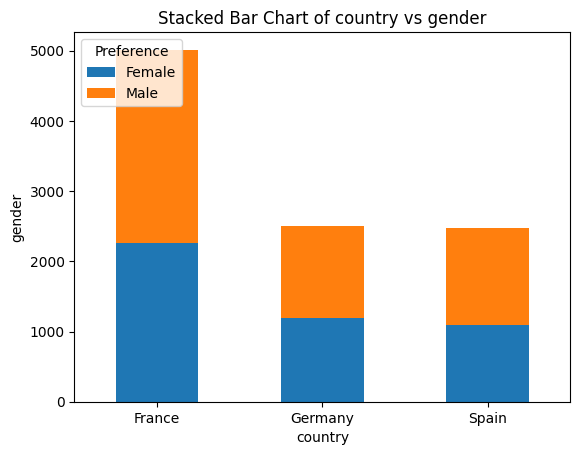


Chi-Squared Test for country vs products_number: Chi2-statistic = 49.242, p-value = 0.000
  - The variables country and products_number are statistically dependent (association exists).



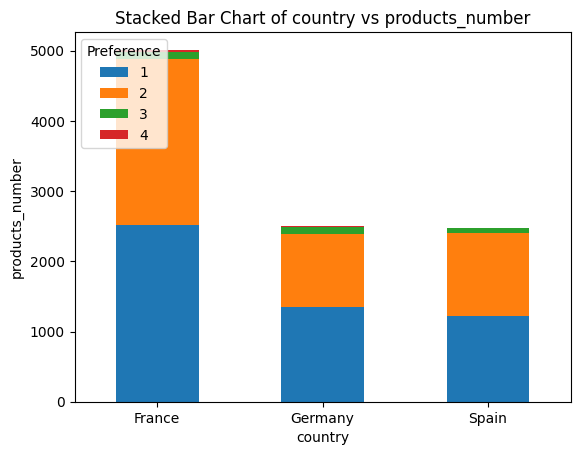


Chi-Squared Test for gender vs country: Chi2-statistic = 6.918, p-value = 0.031
  - The variables gender and country are statistically dependent (association exists).



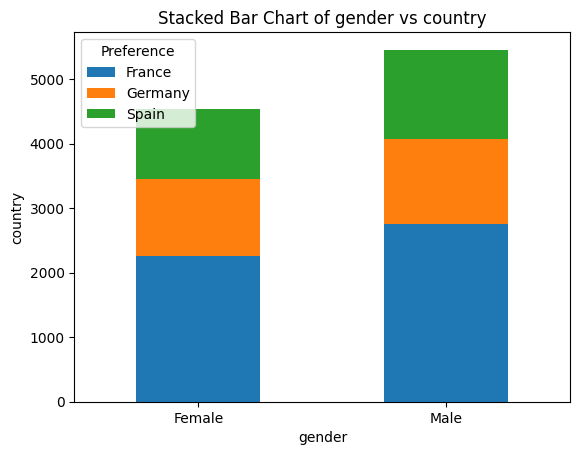


Chi-Squared Test for gender vs products_number: Chi2-statistic = 20.487, p-value = 0.000
  - The variables gender and products_number are statistically dependent (association exists).



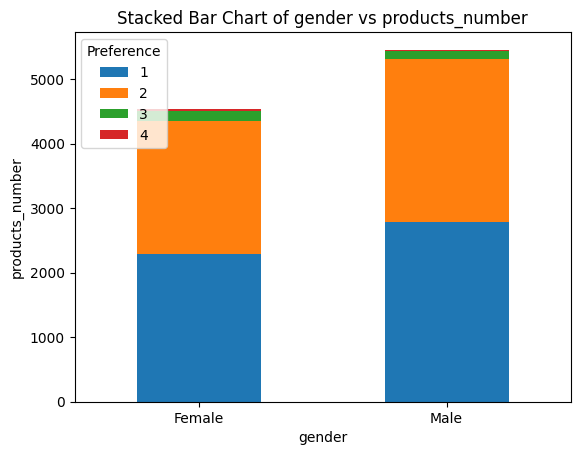


Chi-Squared Test for gender vs active_member: Chi2-statistic = 4.992, p-value = 0.025
  - The variables gender and active_member are statistically dependent (association exists).



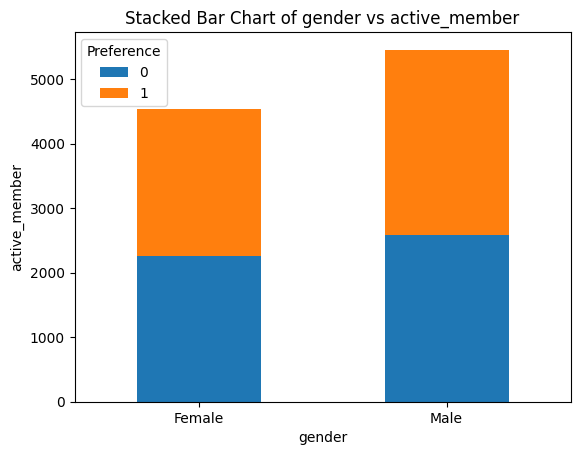


Chi-Squared Test for products_number vs country: Chi2-statistic = 49.242, p-value = 0.000
  - The variables products_number and country are statistically dependent (association exists).



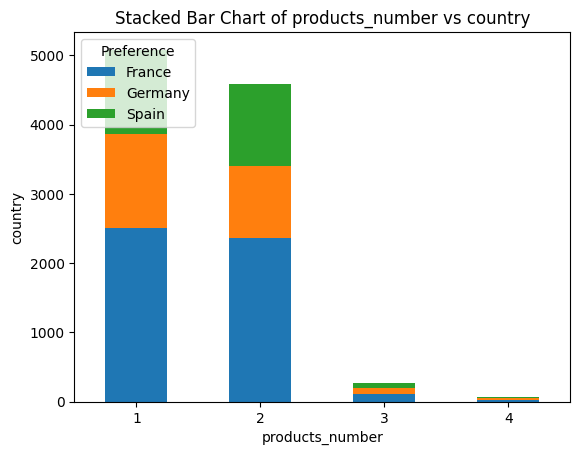


Chi-Squared Test for products_number vs gender: Chi2-statistic = 20.487, p-value = 0.000
  - The variables products_number and gender are statistically dependent (association exists).



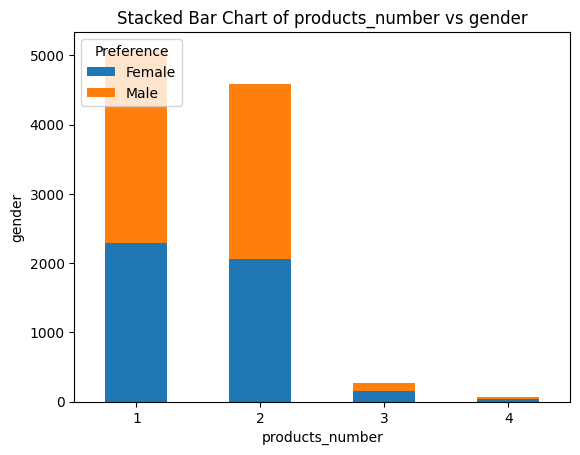


Chi-Squared Test for products_number vs active_member: Chi2-statistic = 17.194, p-value = 0.001
  - The variables products_number and active_member are statistically dependent (association exists).



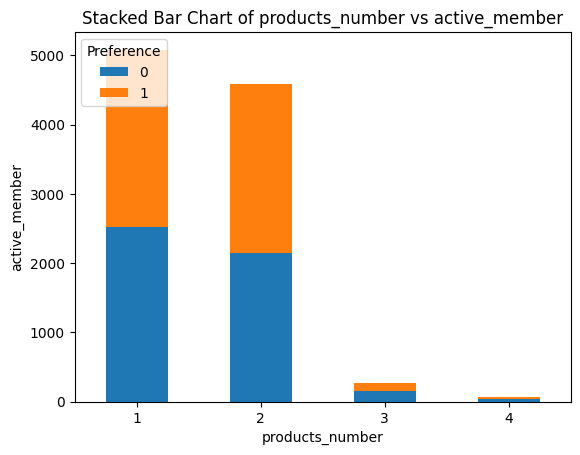


Chi-Squared Test for active_member vs gender: Chi2-statistic = 4.992, p-value = 0.025
  - The variables active_member and gender are statistically dependent (association exists).



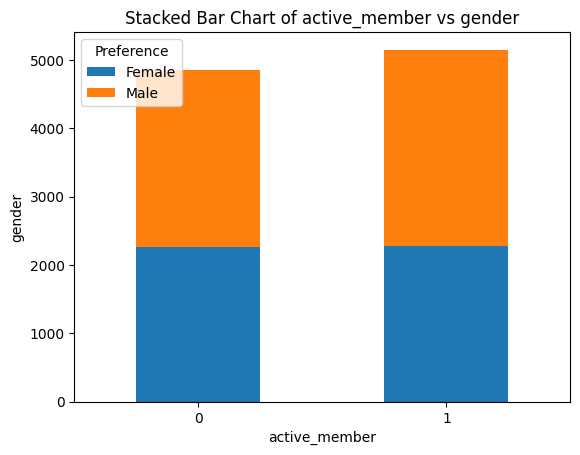


Chi-Squared Test for active_member vs products_number: Chi2-statistic = 17.194, p-value = 0.001
  - The variables active_member and products_number are statistically dependent (association exists).



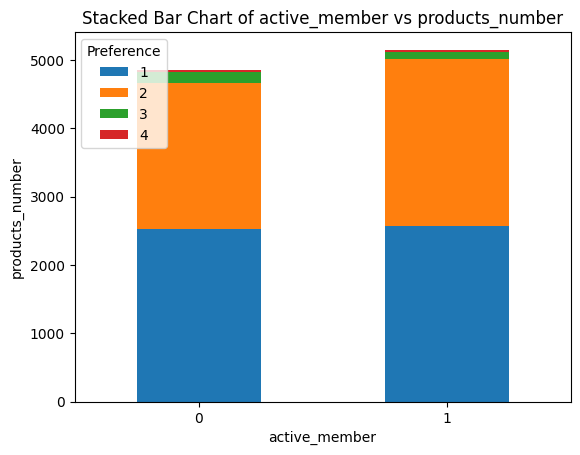

['credit_card']


In [23]:
from scipy.stats import chi2_contingency
# Perform Chi-Squared Test for categorical vs categorical
independent_columns = []
for cat_col_1 in categorical_data_columns:
    dependency = False
    for cat_col_2 in categorical_data_columns:
        if cat_col_1 != cat_col_2:  # Avoid testing the same column against itself
            # Create a contingency table (cross-tabulation of the two categorical variables)
            contingency_table = pd.crosstab(dataset[cat_col_1], dataset[cat_col_2])
            
            # Perform Chi-Squared Test
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
                        
            if p_value < 0.05:
                dependency = True
                print(f"\nChi-Squared Test for {cat_col_1} vs {cat_col_2}: Chi2-statistic = {chi2_stat:.3f}, p-value = {p_value:.3f}")
                print(f"  - The variables {cat_col_1} and {cat_col_2} are statistically dependent (association exists).\n")
                contingency_table.plot(kind='bar', stacked=True)
                plt.title(f'Stacked Bar Chart of {cat_col_1} vs {cat_col_2}')
                plt.xlabel(cat_col_1)
                plt.ylabel(cat_col_2)
                plt.xticks(rotation=0)
                plt.legend(title='Preference', loc='upper left')
                plt.show()
    if not dependency:
        independent_columns.append(cat_col_1)

print(independent_columns)

In [24]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the DataFrame
# dataset_normalized = scaler.fit_transform(dataset[continuous_data_columns])

# # Convert the result back to a DataFrame
# dataset_normalized_continuous = pd.DataFrame(dataset_normalized, columns=dataset[continuous_data_columns].columns)


# dataset_normalized = dataset.copy()
# for column in continuous_data_columns:
#     dataset_normalized[column] = dataset_normalized_continuous[column]

# label_encoder = LabelEncoder()
# dataset_normalized["gender"] = label_encoder.fit_transform(dataset['gender'])
# dataset_normalized["country"] = label_encoder.fit_transform(dataset['country'])


# print(dataset_normalized)


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

# Initialize the MinMaxScaler
scaler = StandardScaler()

dataset_normalized = dataset.drop("churn", axis=1).copy()
label_encoder = LabelEncoder()
dataset_normalized["gender"] = label_encoder.fit_transform(dataset['gender'])
dataset_normalized["country"] = label_encoder.fit_transform(dataset['country'])

# Apply the scaler to the DataFrame
dataset_normalized = scaler.fit_transform(dataset_normalized)

# Convert the result back to a DataFrame
dataset_normalized = pd.DataFrame(dataset_normalized, columns=dataset.drop("churn", axis=1).columns)
dataset_normalized["churn"] = dataset["churn"]
dataset_normalized = dataset_normalized.drop("tenure", axis=1).drop("estimated_salary", axis=1).drop("credit_card", axis=1)
print(dataset_normalized)


      credit_score   country    gender       age   balance  products_number  \
0        -0.326221 -0.901886 -1.095988  0.293517 -1.225848        -0.911583   
1        -0.440036  1.515067 -1.095988  0.198164  0.117350        -0.911583   
2        -1.536794 -0.901886 -1.095988  0.293517  1.333053         2.527057   
3         0.501521 -0.901886 -1.095988  0.007457 -1.225848         0.807737   
4         2.063884  1.515067 -1.095988  0.388871  0.785728        -0.911583   
...            ...       ...       ...       ...       ...              ...   
9995      1.246488 -0.901886  0.912419  0.007457 -1.225848         0.807737   
9996     -1.391939 -0.901886  0.912419 -0.373958 -0.306379        -0.911583   
9997      0.604988 -0.901886 -1.095988 -0.278604 -1.225848        -0.911583   
9998      1.256835  0.306591  0.912419  0.293517 -0.022608         0.807737   
9999      1.463771 -0.901886 -1.095988 -1.041433  0.859965        -0.911583   

      active_member  churn  
0          0.970243   

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



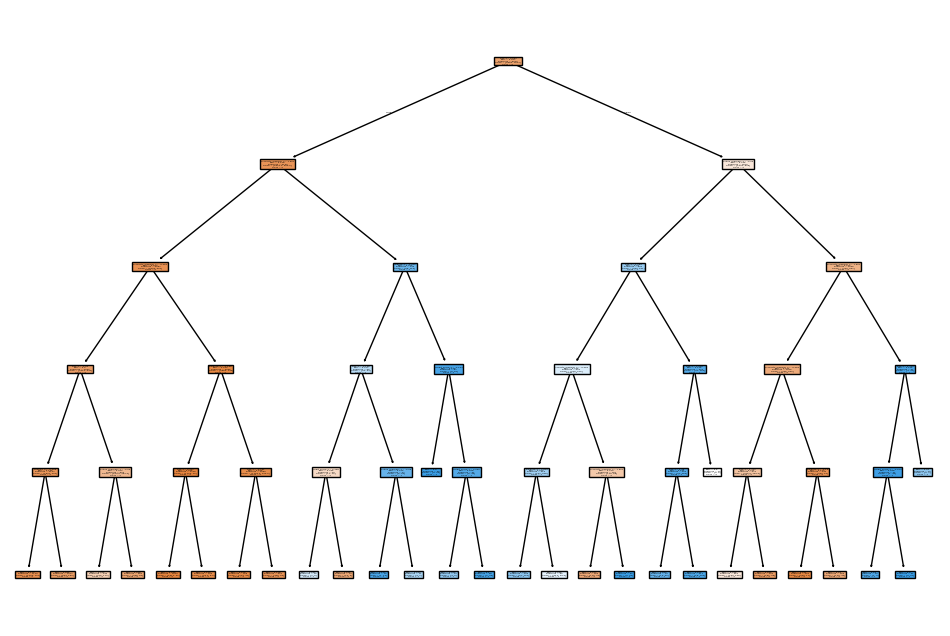

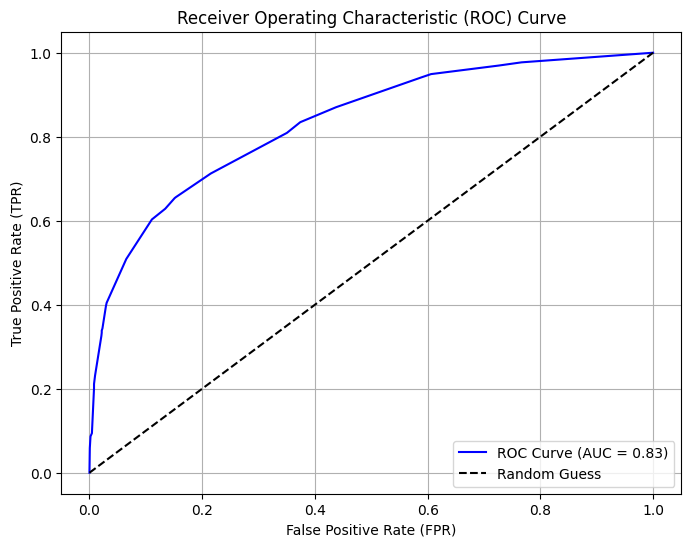

Confusion Matrix:
[[1560   47]
 [ 237  156]]


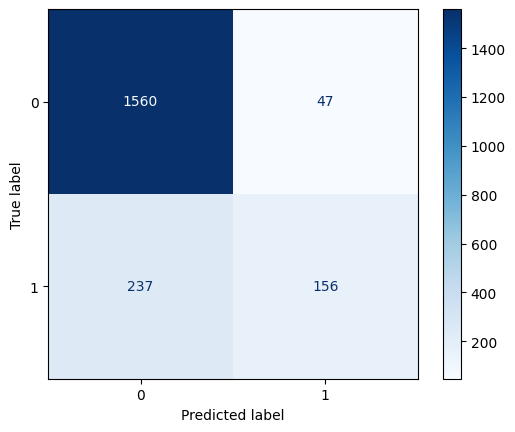

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = dataset_normalized.drop("churn", axis=1)
y = dataset_normalized["churn"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=5, max_features=None)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()

y_probs = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")



class prior: [0.7945 0.2055]
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.69      0.24      0.36       393

    accuracy                           0.83      2000
   macro avg       0.77      0.61      0.63      2000
weighted avg       0.81      0.83      0.80      2000



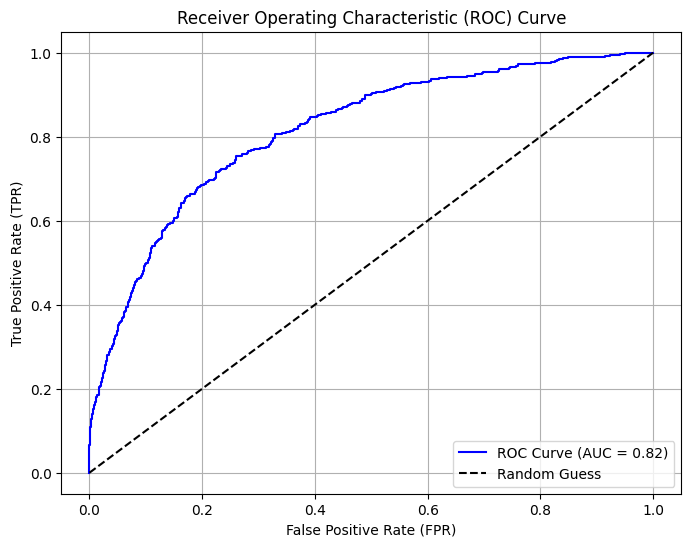

Confusion Matrix:
[[1565   42]
 [ 298   95]]


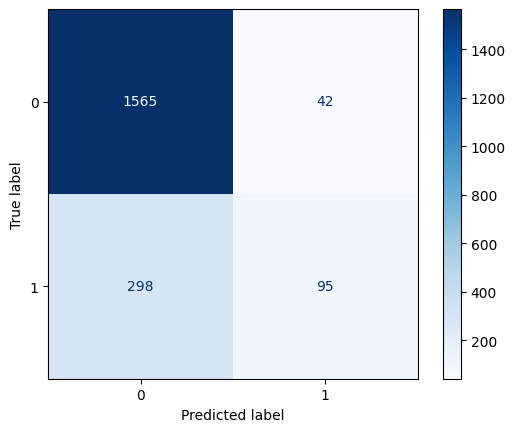

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

model = GaussianNB()
model.fit(X_train, y_train)

print(f"class prior: {model.class_prior_}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_probs = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}
Best Cross-Validation Accuracy: 0.8574991516908099
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



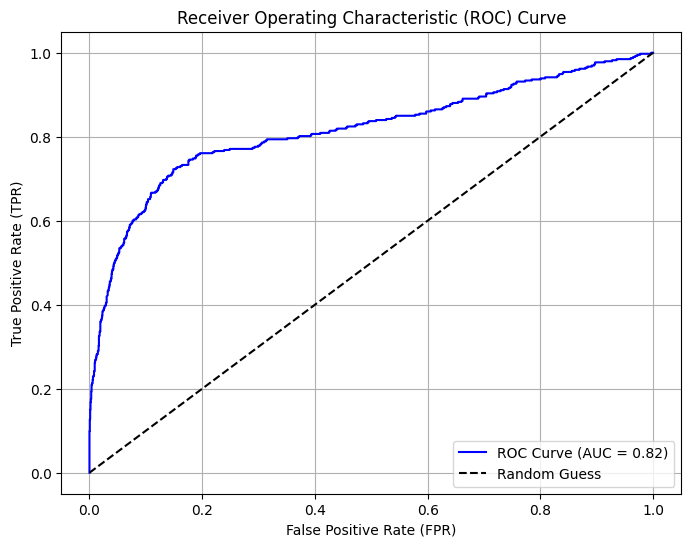

Confusion Matrix:
[[1552   55]
 [ 222  171]]


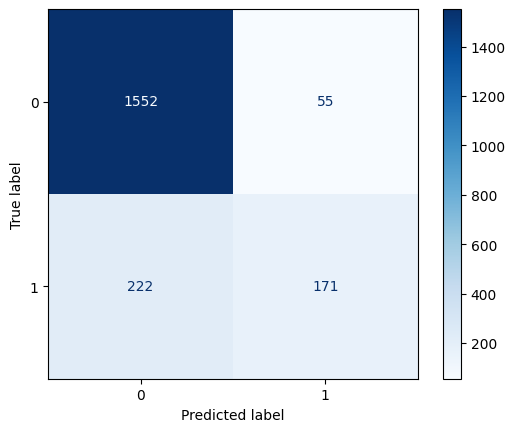

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],       # Regularization parameter
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],    # Kernel coefficient
    "probability": [True]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,            # 3-fold cross-validation
    verbose=1,
    n_jobs=-1        # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_probs = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.61      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.77      2000



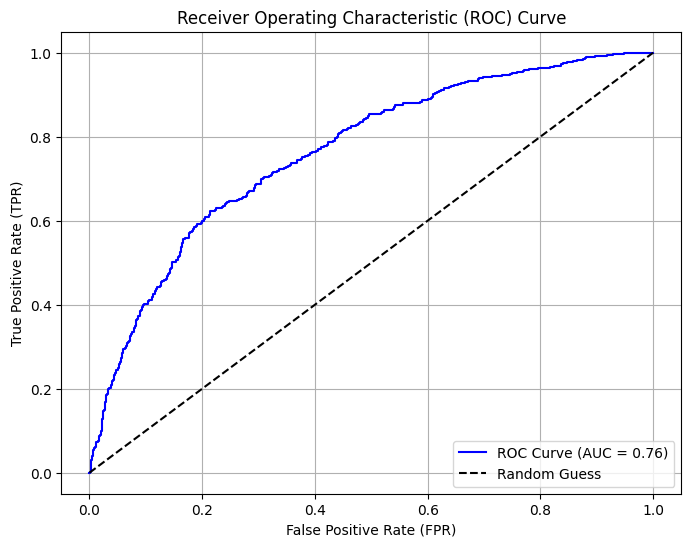

Confusion Matrix:
[[1560   47]
 [ 321   72]]


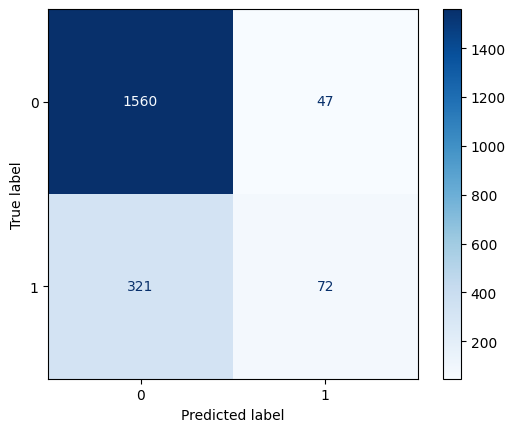

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

y_probs = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
